# Using age, cholestrol, and resting blood pressure to classify heart disease patients from Cleveland #

**John Mao and Caitlyn Chan**


### Introduction ###
Heart diseases are the leading cause of death worldwide, accounting for an estimated 17.9 million casualties each year according to the [WHO.](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1)

Our project seeks to use age, cholesterol, and resting blood pressure of at-risk individuals to aid in the early identification of heart diseases for effective preventatitive interventions. 
We wish to know if an individual's cholesterol, age, resting blood pressure, and sex can be used to accurately predict their likelihood of being afflicted by heart disease. Furthermore, we wish to identify which of the factors has the greatest influence on an individual's diagnosis.

To answer our questions, we are using the [heart disease](https://archive.ics.uci.edu/dataset/45/heart+disease) database.is.

In [27]:
# importing relevant libraries 
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

In [28]:
# reading the dataframe from a .csv file
heart_data <- read_csv("heart_data.csv") 

# cleaning and wrangling the data frame, selecting relevant columns
heart_data_clean <- heart_data |>
select(chol, trestbps, age, sex, num) |>
mutate(sex = as_factor(sex))|>
mutate(sex = fct_recode(sex, "male" = "1", "female" = "0")) |>
mutate(num = as_factor(num)) 

# splitting data into training data set and testing data set 
heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = num)

heart_testing <- testing(heart_split)
heart_training <- training(heart_split)

heart_training
print(paste("Total rows", nrow(heart_data_clean)))
print(paste("Rows with missing data", sum(is.na(heart_data_clean))))


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


chol,trestbps,age,sex,num
<dbl>,<dbl>,<dbl>,<fct>,<fct>
204,130,41,female,0
236,120,56,male,0
192,140,57,male,0
⋮,⋮,⋮,⋮,⋮
319,136,58,female,3
205,128,55,female,3
131,130,57,male,3


[1] "Total rows 303"
[1] "Rows with missing data 0"


### Preliminary exploratory data analysis ###
We have 303 total rows of data amongst our 5 variables with no observations that contain missing data.

To investigate potential trends, we created the following visualizations:

* Resting blood pressure versus age, examining associations with heart disease diagnosis.

* Cholesterol versus age, separated by sex to explore potential differences between male and female patients.


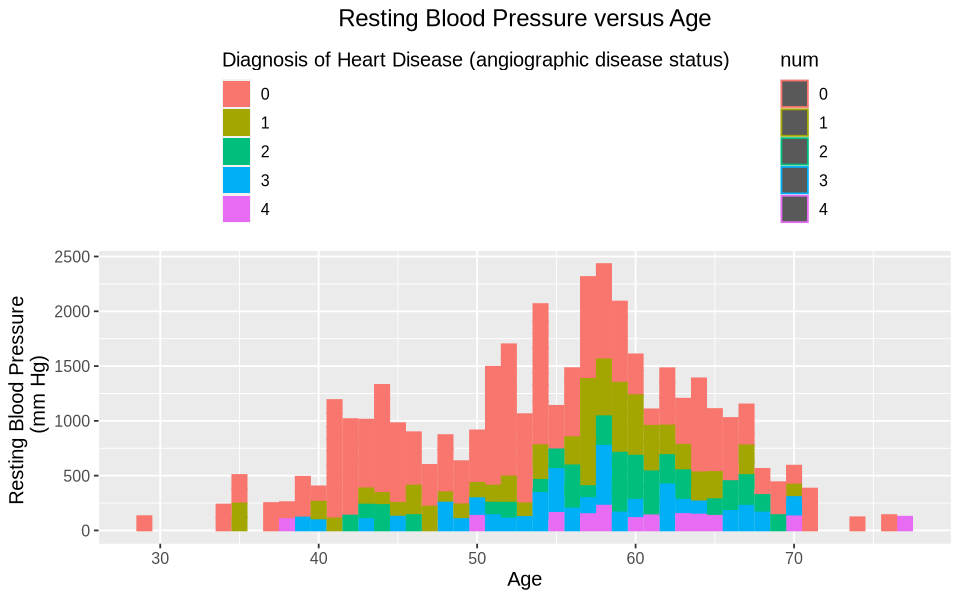

In [30]:
options(repr.plot.width = 8, repr.plot.height = 5)


heart_data_plot_2 <- heart_data_clean |> 
            # should be changing true and false to human readable labels 
            ggplot(aes(x= age, y= trestbps, color = num, fill = num)) +
            geom_bar(stat = "identity")+ 
            labs(x= "Age", y = "Resting Blood Pressure \n (mm Hg)", fill = "Diagnosis of Heart Disease (angiographic disease status)", title = "Resting Blood Pressure versus Age", num = "Diagnosis of Heart Disease")+ # rename false and true 
            theme(text = element_text(size = 12),
            legend.position = "top", 
            legend.direction = "vertical")+
theme(plot.title = element_text(hjust = 0.5))

heart_data_plot_2 
 



### Methods ###
We will be using the variables:
- chol : serium cholestoral in mg/dl
- age : age in years
- trestbps : resting blood pressure (in mm Hg on admission to hospital)
- sex
- num : 0 = unafflicted by disease, (1,2,3,4) showing presense of heart disease.

We have changed the sex and num (presense of heart disease) to factors due to them being discrete variables as opposed to continous.
We are going to train and classify using K-nearest neighbours to attempt to determine if a new patient is likely to be afflicted by heart disease.
s
### Expected Outcomes and Significance ##
#We expect to see a positive trend with resting blood pressure and age. We also expect to see that on average, those afflicted with heart diseases will have higher blood pressures.
We wish to explore how sex also impacts an individual's potential risk.
to?
### Bibliography ### 
- proper citation of article, data base, cleavland clinic and people involved? 

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Using size for a discrete variable is not advised.”


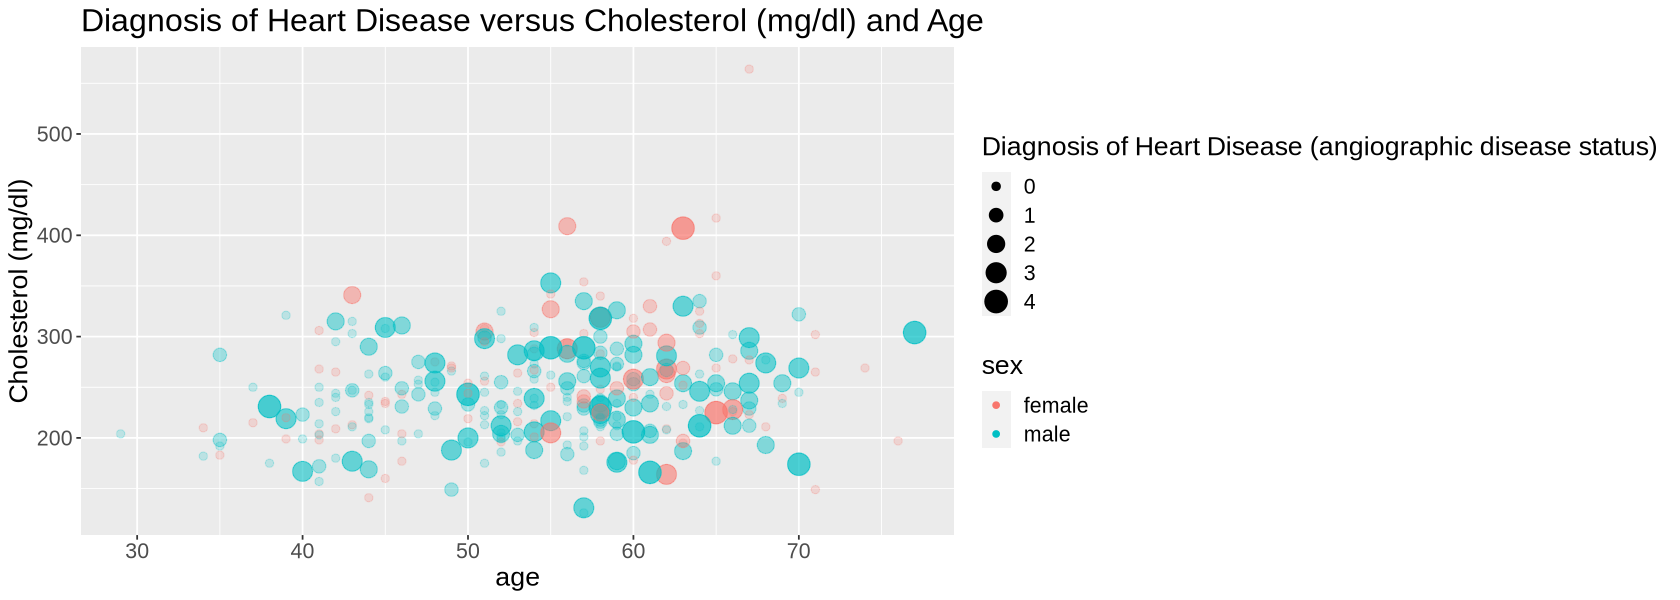

In [31]:
options(repr.plot.width = 14, repr.plot.height = 5)

heart_chol_plot <- ggplot(heart_data_clean, aes(x = age, y = chol, size = num, alpha = num, color = sex)) + 
  geom_point() +
  scale_alpha_discrete(range = c(0.2, 0.7), guide = "none") +
  labs(size = "Diagnosis of Heart Disease (angiographic disease status)",
       title = "Diagnosis of Heart Disease versus Cholesterol (mg/dl) and Age",
       y = "Cholesterol (mg/dl)") +
  theme(text = element_text(size = 16)) 

heart_chol_plot